In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sns.set_theme(color_codes = True)


In [3]:
df = pd.read_csv("supply_chain_data.csv")
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
df.shape

(100, 24)

In [5]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [6]:
df.select_dtypes(include="object").nunique()

Product type               3
SKU                      100
Customer demographics      4
Shipping carriers          3
Supplier name              5
Location                   5
Inspection results         3
Transportation modes       4
Routes                     3
dtype: int64

In [7]:
df.drop(columns="SKU",inplace =True)
df.shape

(100, 23)

In [8]:
df

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,77.903927,65,672,7386.363944,Unknown,15,14,26,9,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,3.526111,56,62,4370.916580,Male,46,19,4,9,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,19.754605,43,913,8525.952560,Female,53,1,27,7,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


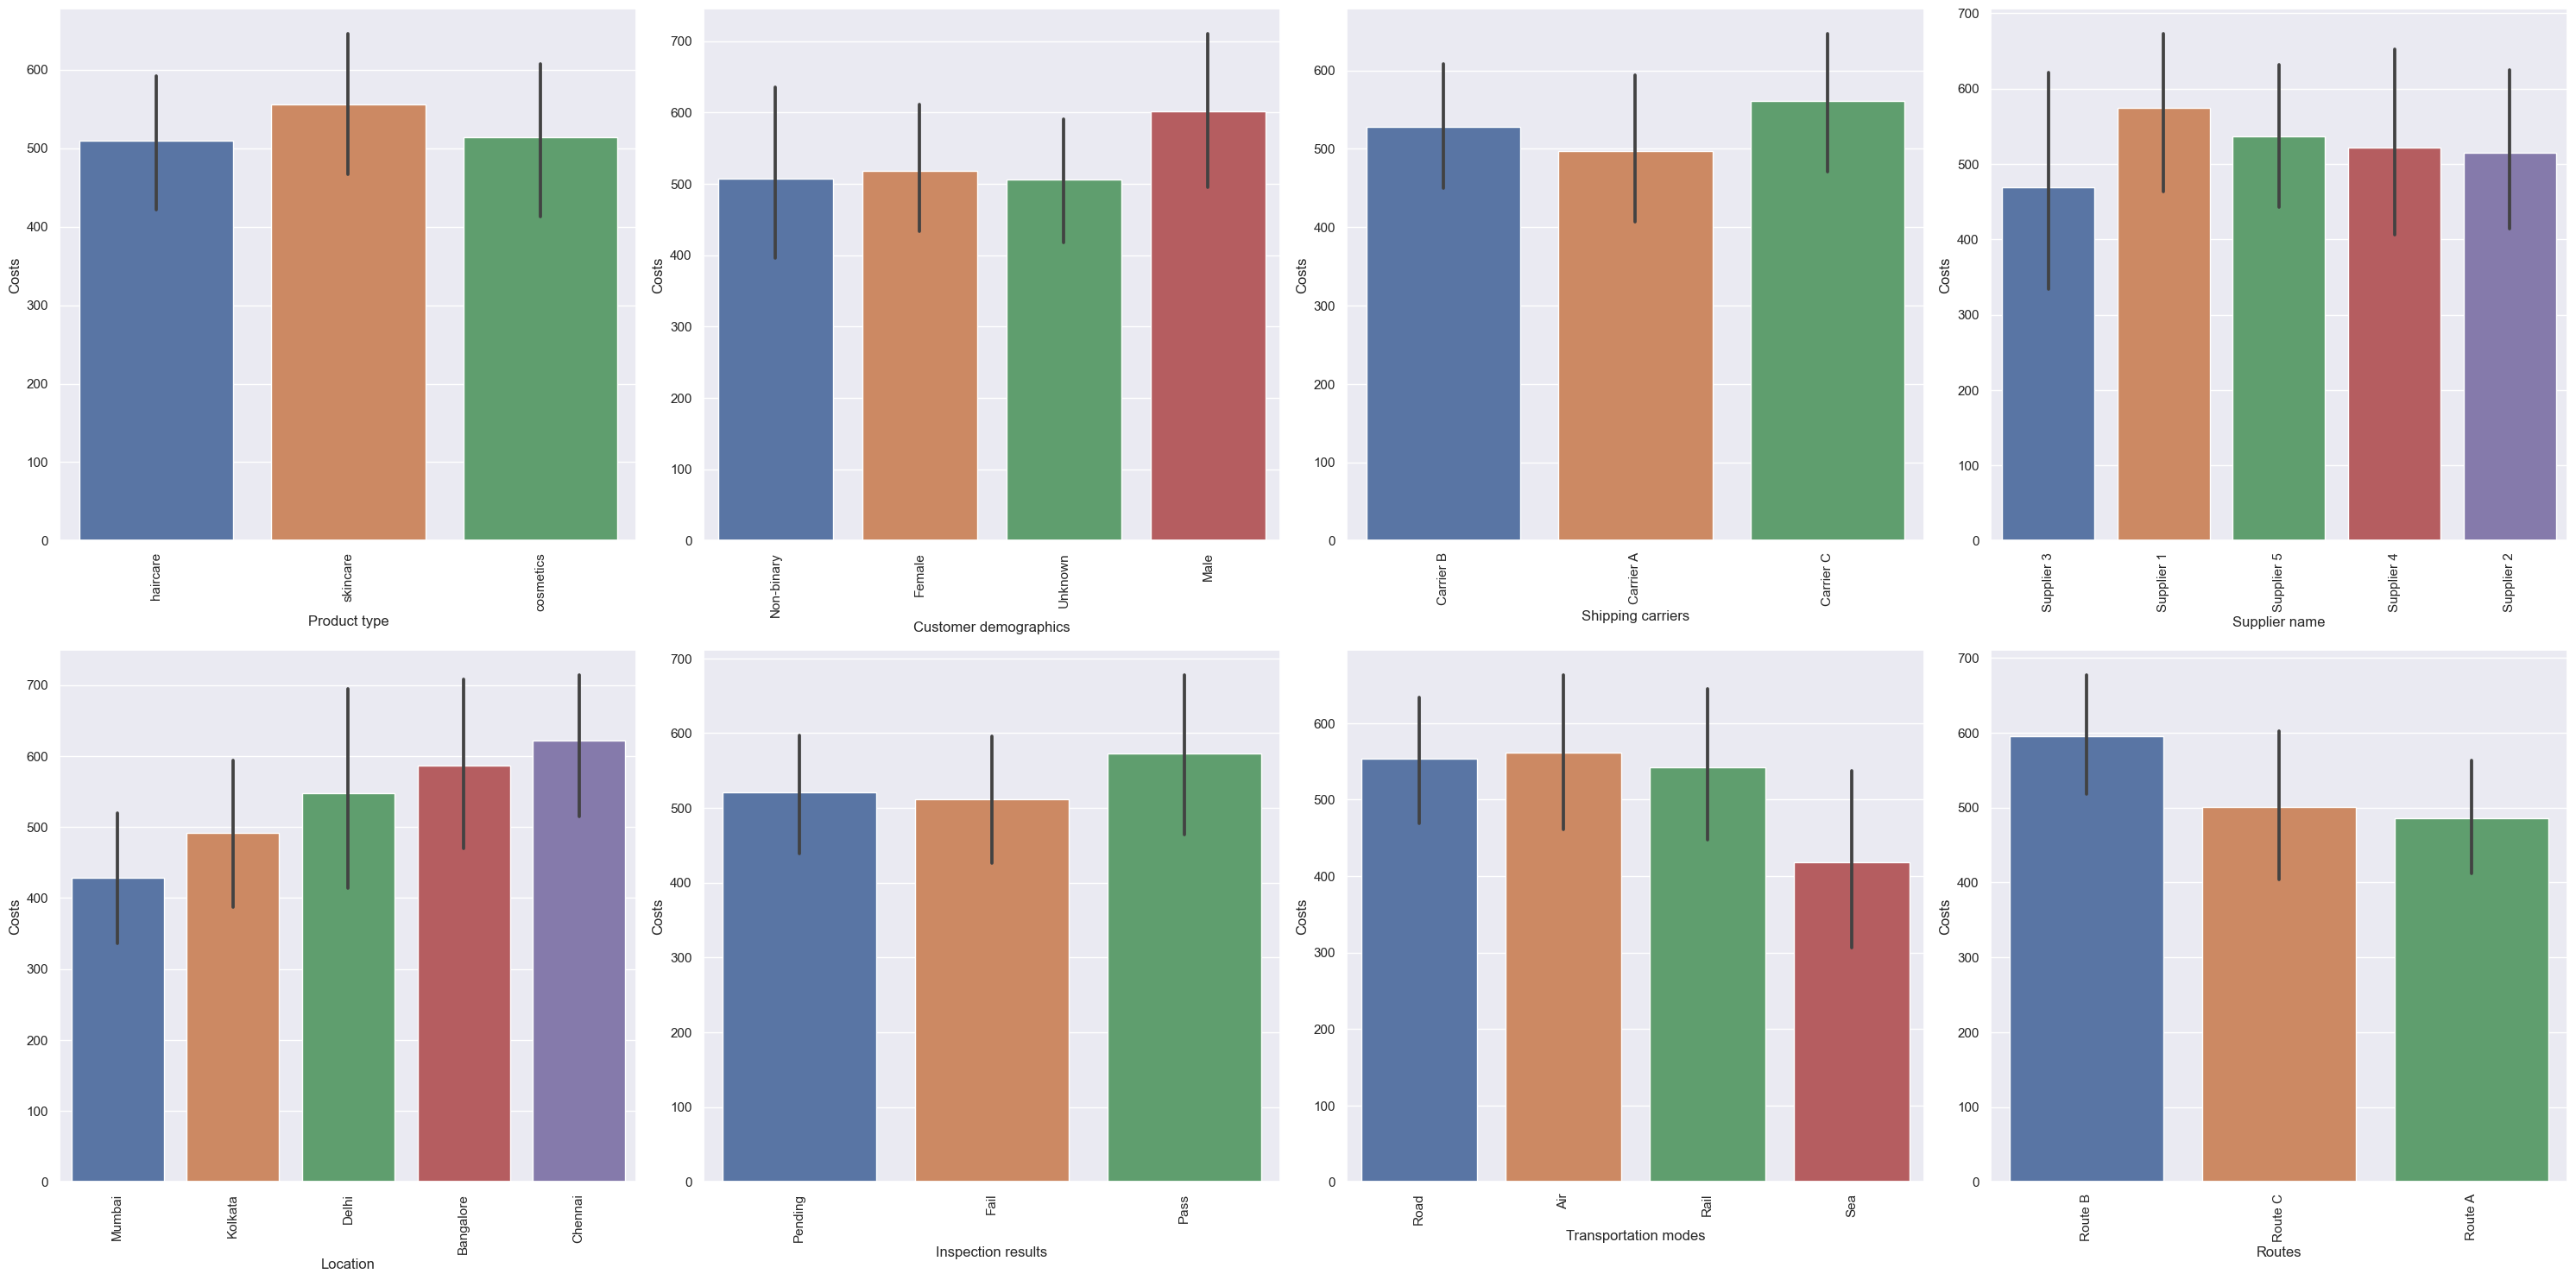

In [9]:
cat_vars = ["Product type",'Customer demographics','Shipping carriers','Supplier name','Location',
           'Inspection results','Transportation modes','Routes']

fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(30,15))
axs = axs.flatten()

for i,var in enumerate(cat_vars):
    sns.barplot(x=var,y="Costs",data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
fig.tight_layout()

plt.show()
    
    

In [10]:
df.columns

Index(['Product type', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Customer demographics', 'Stock levels',
       'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs'],
      dtype='object')

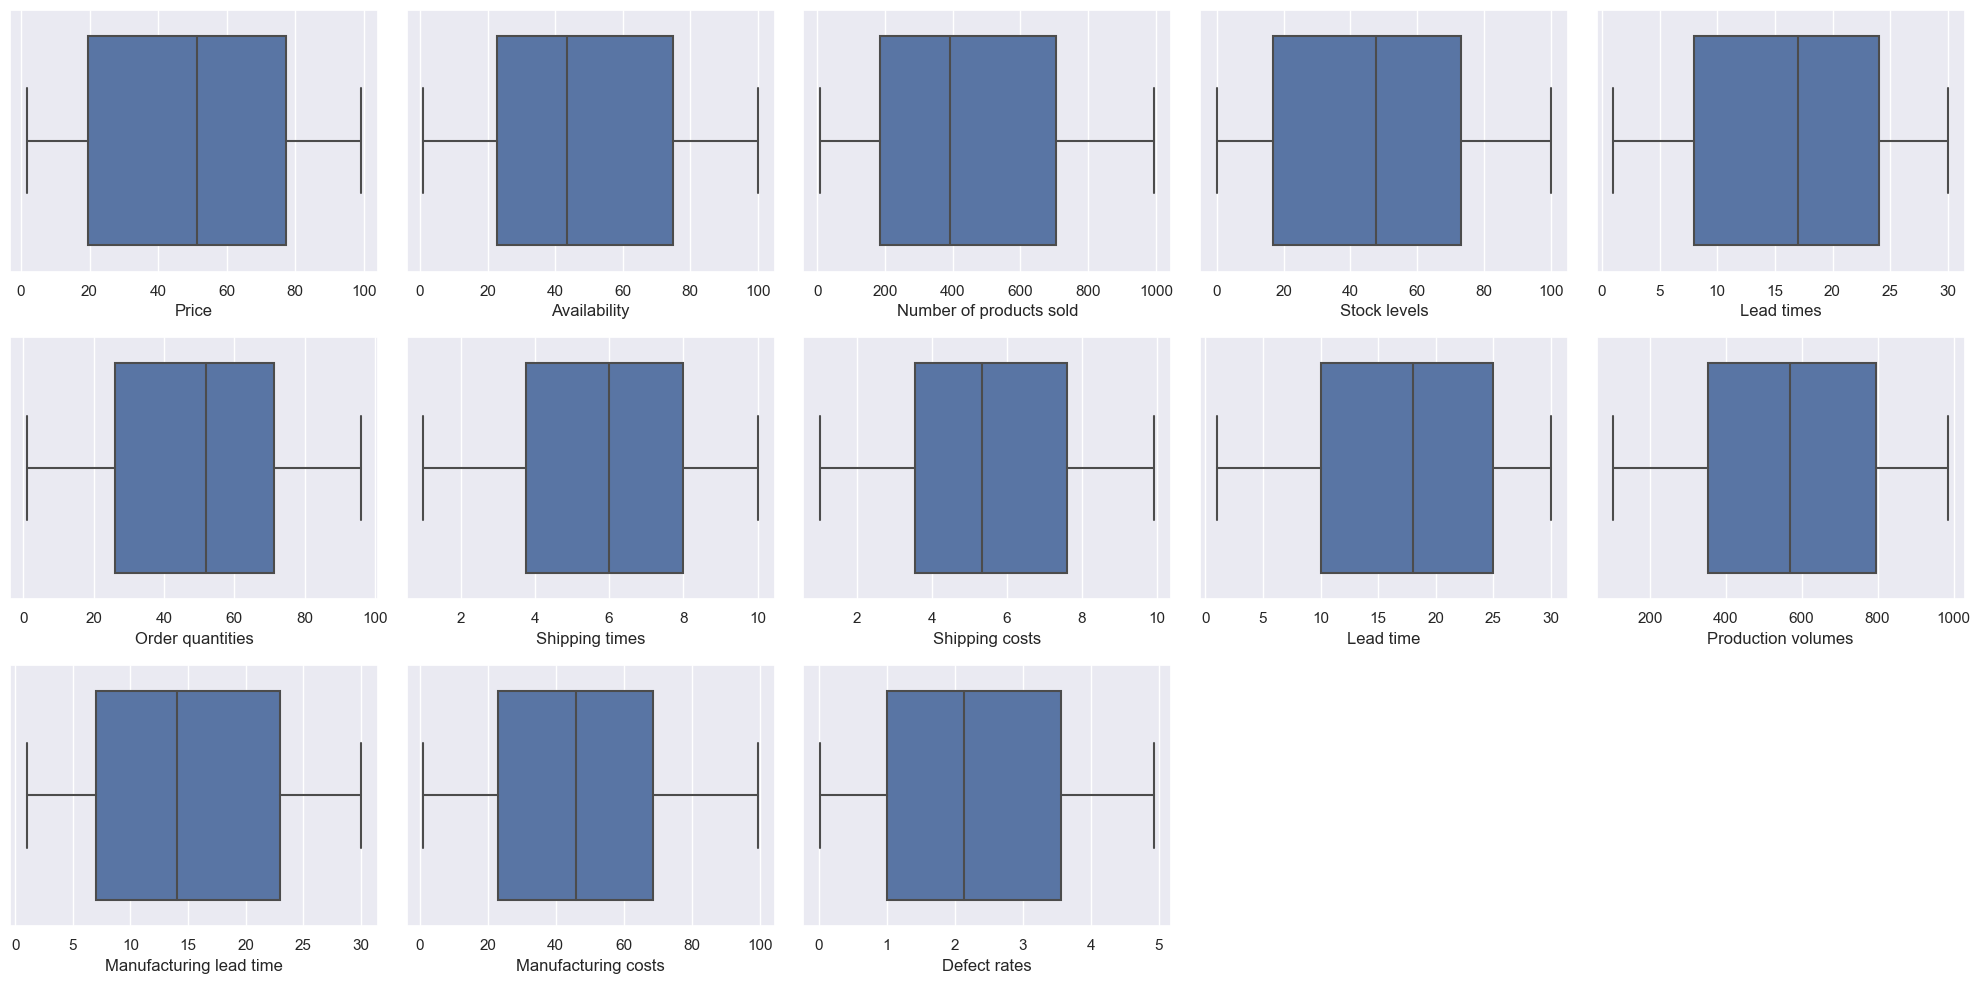

In [12]:
num_vars = ['Price', 'Availability', 'Number of products sold',
            'Stock levels','Lead times', 'Order quantities', 'Shipping times','Shipping costs',
            'Lead time','Production volumes', 'Manufacturing lead time',
            'Manufacturing costs' , 'Defect rates',]

fig,axs = plt.subplots(nrows = 3,ncols = 5,figsize = (20,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    
fig.delaxes(axs[13])

fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

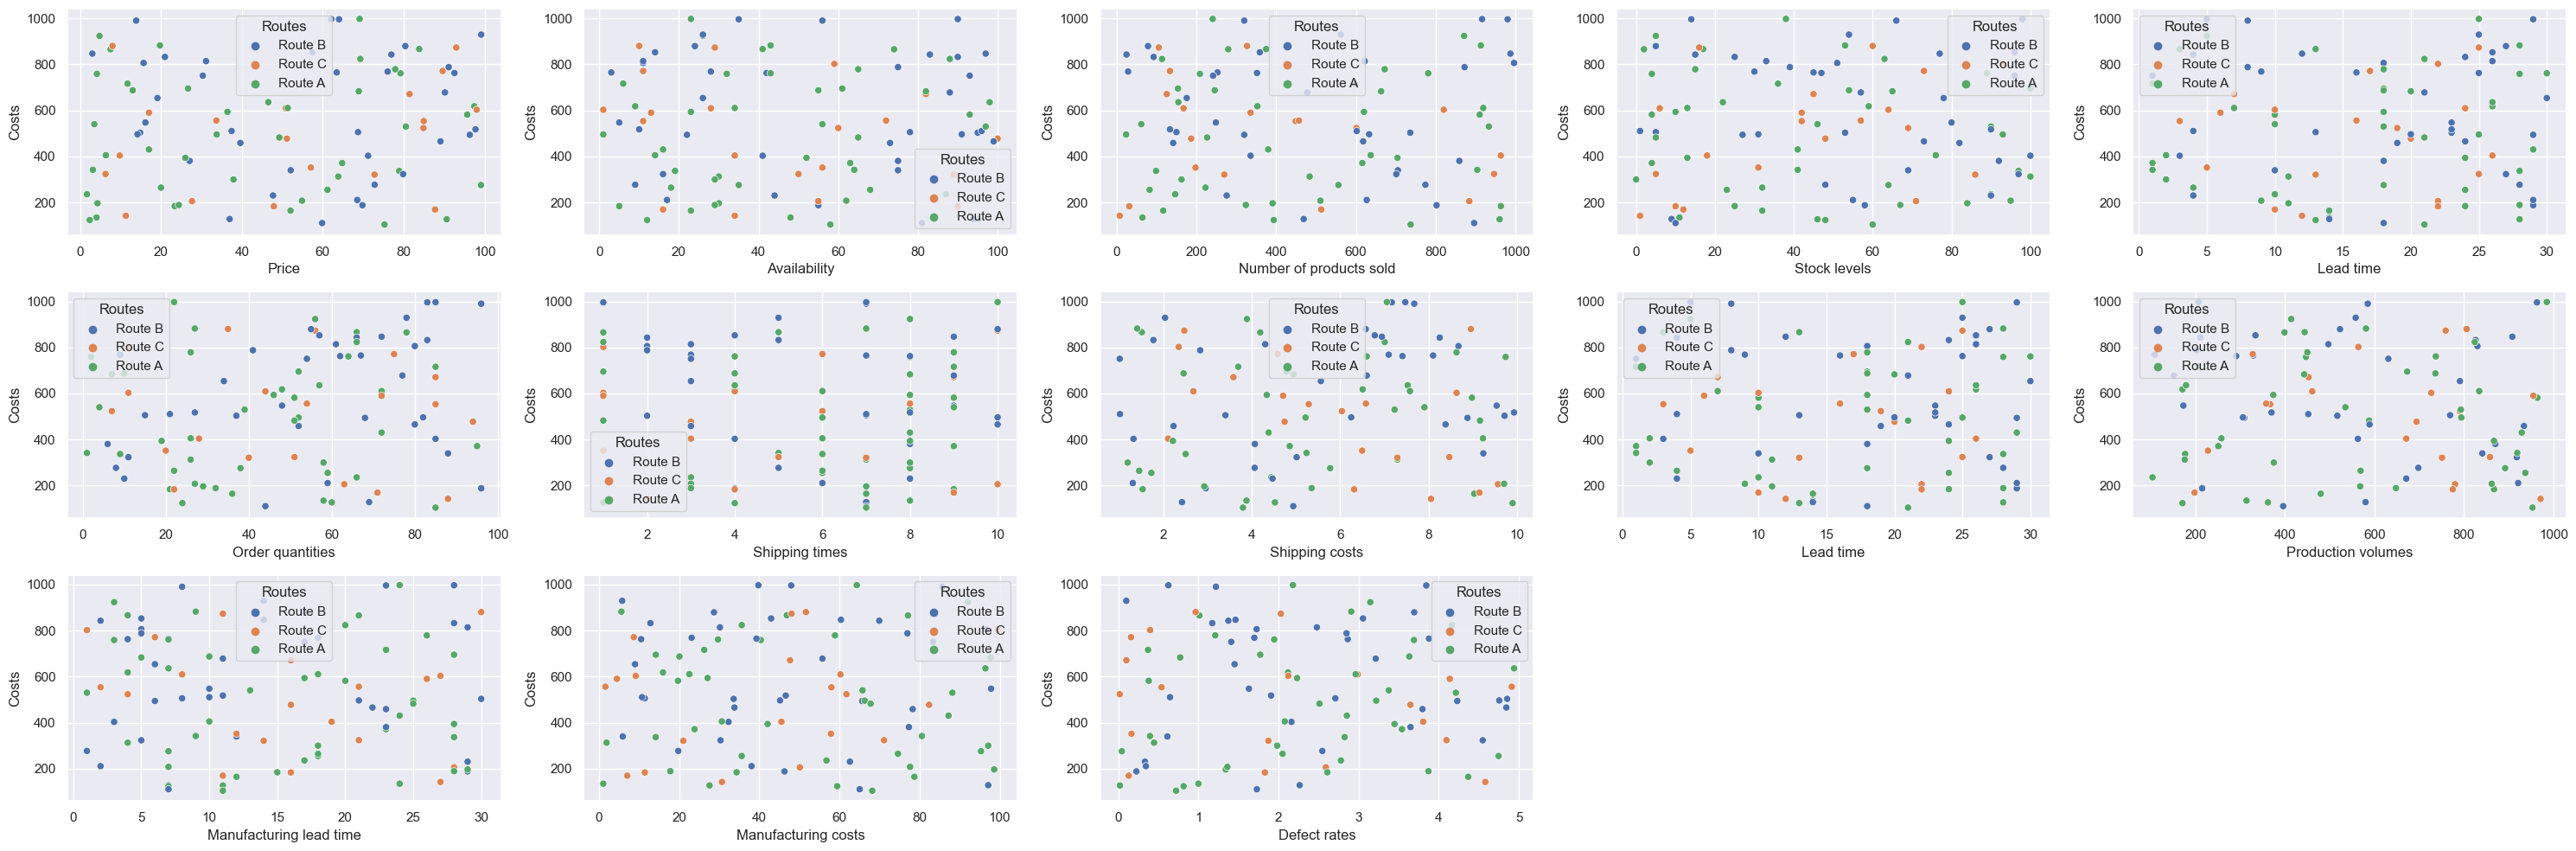

In [20]:
num_vars = ['Price','Availability','Number of products sold','Stock levels',
           'Lead time','Order quantities','Shipping times','Shipping costs',
           'Lead time','Production volumes','Manufacturing lead time','Manufacturing costs','Defect rates']

fig, axs = plt.subplots(nrows = 3,ncols = 5, figsize=(30,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x = var,y='Costs',hue='Routes',data=df,ax = axs[i])
    
# remove the 14th subplot
fig.delaxes(axs[13])

fig.delaxes(axs[14])

fig.tight_layout()
plt.show()